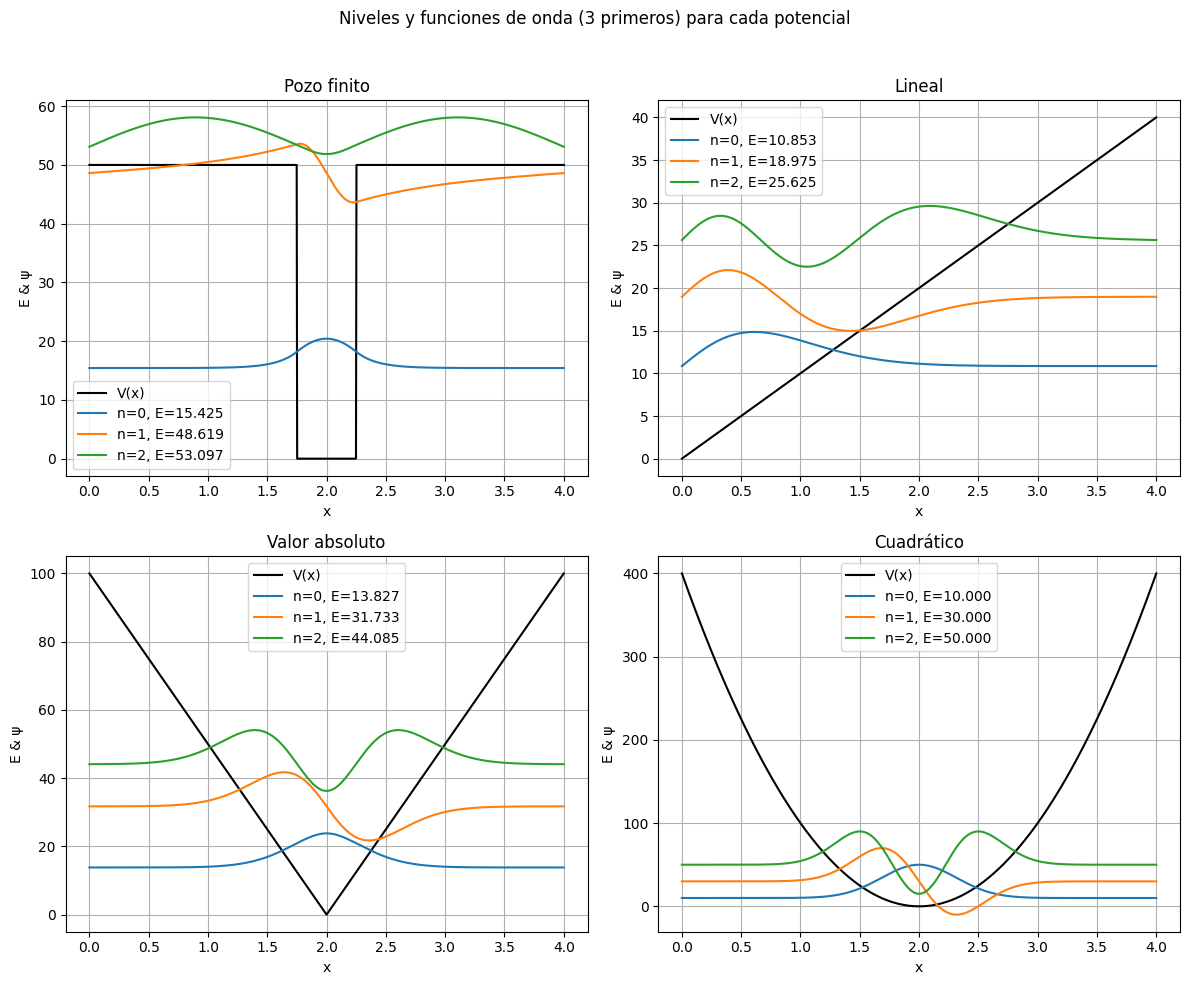

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# ------------------ Potenciales ------------------
def potential_finite_well(x, L, a, V0):
    center = L/2
    return np.where(np.abs(x-center) <= a/2, 0, V0)

def potential_linear(x, alpha):
    return alpha * x

def potential_abs(x, beta, L):
    center = L/2
    return beta * np.abs(x - center)

def potential_quadratic(x, gamma, L):
    center = L/2
    return gamma * (x - center)**2

# ------------------ Método de Numerov ------------------
def numerov_step(psi_prev, psi_curr, k_prev_sq, k_curr_sq, k_next_sq, dx):
    return (
        2*(1 - (5/12)*dx**2*k_curr_sq)*psi_curr
        - (1 + (1/12)*dx**2*k_prev_sq)*psi_prev
    ) / (1 + (1/12)*dx**2*k_next_sq)

# ------------------ Resolver Schrödinger (Numerov) ------------------
def solve_numerov(E, potential_func, x, dx, psi1, **kwargs):
    V = potential_func(x, **kwargs)
    k2 = E - V
    psi = np.zeros_like(x)
    psi[1] = psi1
    for i in range(1, len(x)-1):
        psi[i+1] = numerov_step(
            psi[i-1], psi[i],
            k2[i-1], k2[i], k2[i+1], dx
        )
    return psi, V

# ------------------ Función de disparo ------------------
def shoot_mismatch(E, x, dx, potential_func, psi1, params):
    psi, _ = solve_numerov(E, potential_func, x, dx, psi1, **params)
    return psi[-1]

# ------------------ Encontrar múltiples niveles ------------------
def find_eigenvalues(potential_func, x, dx, psi1, params, n_levels,
                     E_min, E_max, n_scan=500):
    # barrido de energías y buscar cambios de signo en psi(L)
    E_scan = np.linspace(E_min, E_max, n_scan)
    mismatches = np.array([shoot_mismatch(E, x, dx, potential_func, psi1, params) for E in E_scan])
    # detectar intervalos con cambio de signo
    idx = np.where(np.sign(mismatches[:-1]) * np.sign(mismatches[1:]) < 0)[0]
    eigenvals = []
    for i in idx:
        if len(eigenvals) >= n_levels: break
        E_root = brentq(shoot_mismatch, E_scan[i], E_scan[i+1],
                        args=(x, dx, potential_func, psi1, params))
        eigenvals.append(E_root)
    return eigenvals

# ------------------ Parámetros y dominio ------------------
L = 4.0
x_min, x_max = 0.0, L
N = 1000
x = np.linspace(x_min, x_max, N+1)
dx = (x_max - x_min) / N
# condición inicial base
psi1_default = 1e-5

# definir cada potencial con psi1 y rango de energía para autovalores
potentials = [
    ('Pozo finito',   potential_finite_well, {'L':L, 'a':0.5, 'V0':50, 'psi1':psi1_default, 'Emax':100}),
    ('Lineal',        potential_linear,      {'alpha':10.0, 'psi1':psi1_default, 'Emax':100}),
    ('Valor absoluto',potential_abs, {'beta':50.0, 'L':L, 'psi1':0.8, 'Emax':100}),
    ('Cuadrático',    potential_quadratic,   {'gamma':100.0, 'L':L, 'psi1':0.8, 'Emax':100}),
]
levels_to_plot = 3

# ------------------ Graficación 2x2 con varios niveles ------------------
fig, axes = plt.subplots(2,2,figsize=(12,10))
for ax, (title, pot_func, params) in zip(axes.flatten(), potentials):
    psi1 = params.pop('psi1')
    Emax = params.pop('Emax')
    # hallar niveles
    eigenvals = find_eigenvalues(pot_func, x, dx, psi1, params,
                                  n_levels=levels_to_plot,
                                  E_min=0, E_max=Emax)
    # graficar potencial
    V = pot_func(x, **params)
    ax.plot(x, V, 'k-', label='V(x)')
    # para cada nivel, resuelve y grafica ψ desplazada
    for i, E in enumerate(eigenvals):
        psi, _ = solve_numerov(E, pot_func, x, dx, psi1, **params)
        psi_norm = psi/np.max(np.abs(psi))
        ax.plot(x, psi_norm*0.1*(V.max()-V.min()) + E,
                label=f'n={i}, E={E:.3f}')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('E & ψ')
    ax.legend()
    ax.grid(True)

plt.suptitle('Niveles y funciones de onda (3 primeros) para cada potencial')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


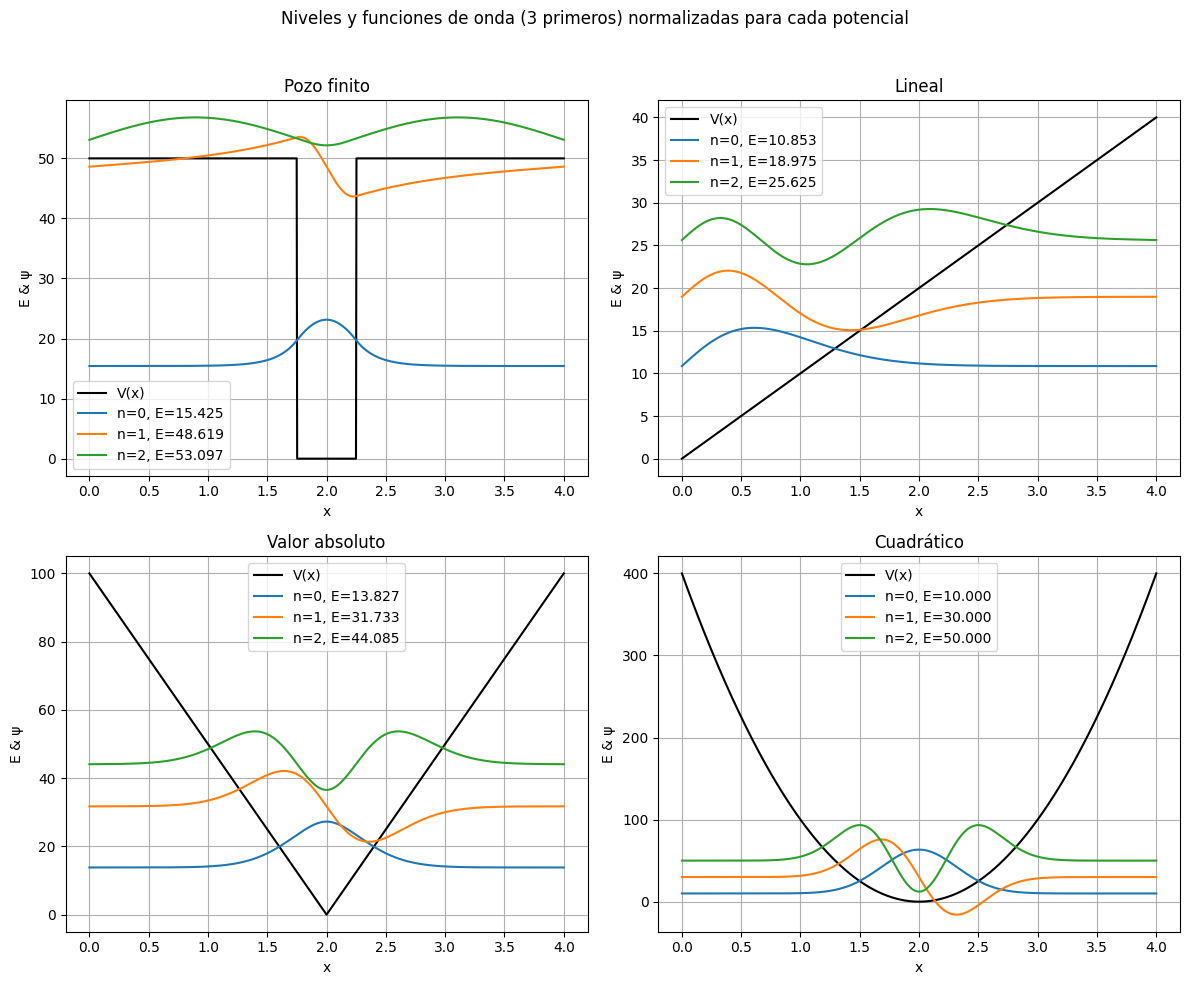

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# ------------------ Potenciales ------------------
def potential_finite_well(x, L, a, V0):
    center = L/2
    return np.where(np.abs(x-center) <= a/2, 0, V0)

def potential_linear(x, alpha):
    return alpha * x

def potential_abs(x, beta, L):
    center = L/2
    return beta * np.abs(x - center)

def potential_quadratic(x, gamma, L):
    center = L/2
    return gamma * (x - center)**2

# ------------------ Método de Numerov ------------------
def numerov_step(psi_prev, psi_curr, k_prev_sq, k_curr_sq, k_next_sq, dx):
    return (
        2*(1 - (5/12)*dx**2*k_curr_sq)*psi_curr
        - (1 + (1/12)*dx**2*k_prev_sq)*psi_prev
    ) / (1 + (1/12)*dx**2*k_next_sq)

# ------------------ Resolver Schrödinger (Numerov) ------------------
def solve_numerov(E, potential_func, x, dx, psi1, **kwargs):
    V = potential_func(x, **kwargs)
    k2 = E - V
    psi = np.zeros_like(x)
    psi[1] = psi1
    for i in range(1, len(x)-1):
        psi[i+1] = numerov_step(
            psi[i-1], psi[i],
            k2[i-1], k2[i], k2[i+1], dx
        )
    return psi, V

# ------------------ Función de disparo ------------------
def shoot_mismatch(E, x, dx, potential_func, psi1, params):
    psi, _ = solve_numerov(E, potential_func, x, dx, psi1, **params)
    return psi[-1]

# ------------------ Normalizar función de onda (usando NumPy) ------------------
def normalize_wavefunction(psi, dx):
    probability_density = np.abs(psi)**2
    integral = np.sum(probability_density) * dx
    if integral == 0:
        return psi
    else:
        norm_constant = np.sqrt(integral)
        psi_normalized = psi / norm_constant
        return psi_normalized

# ------------------ Encontrar múltiples niveles ------------------
def find_eigenvalues(potential_func, x, dx, psi1, params, n_levels,
                     E_min, E_max, n_scan=500):
    # barrido de energías y buscar cambios de signo en psi(L)
    E_scan = np.linspace(E_min, E_max, n_scan)
    mismatches = np.array([shoot_mismatch(E, x, dx, potential_func, psi1, params) for E in E_scan])
    # detectar intervalos con cambio de signo
    idx = np.where(np.sign(mismatches[:-1]) * np.sign(mismatches[1:]) < 0)[0]
    eigenvals = []
    for i in idx:
        if len(eigenvals) >= n_levels: break
        E_root = brentq(shoot_mismatch, E_scan[i], E_scan[i+1],
                        args=(x, dx, potential_func, psi1, params))
        eigenvals.append(E_root)
    return eigenvals

# ------------------ Parámetros y dominio ------------------
L = 4.0
x_min, x_max = 0.0, L
N = 1000
x = np.linspace(x_min, x_max, N+1)
dx = (x_max - x_min) / N
# condición inicial base
psi1_default = 1e-5

# definir cada potencial con psi1 y rango de energía para autovalores
potentials = [
    ('Pozo finito',     potential_finite_well, {'L':L, 'a':0.5, 'V0':50, 'psi1':psi1_default, 'Emax':100}),
    ('Lineal',          potential_linear,       {'alpha':10.0, 'psi1':psi1_default, 'Emax':100}),
    ('Valor absoluto',  potential_abs,          {'beta':50.0, 'L':L, 'psi1':0.8, 'Emax':100}),
    ('Cuadrático',      potential_quadratic,    {'gamma':100.0, 'L':L, 'psi1':0.8, 'Emax':100}),
]
levels_to_plot = 3

# ------------------ Graficación 2x2 con varios niveles (normalización con numpy) ------------------
fig, axes = plt.subplots(2,2,figsize=(12,10))
for ax, (title, pot_func, params) in zip(axes.flatten(), potentials):
    psi1 = params.pop('psi1')
    Emax = params.pop('Emax')
    # hallar niveles
    eigenvals = find_eigenvalues(pot_func, x, dx, psi1, params,
                                 n_levels=levels_to_plot,
                                 E_min=0, E_max=Emax)
    # graficar potencial
    V = pot_func(x, **params)
    ax.plot(x, V, 'k-', label='V(x)')
    # para cada nivel, resuelve y grafica ψ normalizada y desplazada
    for i, E in enumerate(eigenvals):
        psi, _ = solve_numerov(E, pot_func, x, dx, psi1, **params)
        psi_normalized = normalize_wavefunction(psi, dx)
        ax.plot(x, psi_normalized*0.1*(V.max()-V.min()) + E,
                 label=f'n={i}, E={E:.3f}')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('E & ψ')
    ax.legend()
    ax.grid(True)

plt.suptitle('Niveles y funciones de onda (3 primeros) normalizadas para cada potencial')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import ipywidgets as widgets
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown, VBox, HBox
from IPython.display import display

# ------------------ Potenciales ------------------
def potential_finite_well(x, L, a, V0):
    """Finite square well potential centered in the box."""
    center = L/2
    return np.where(np.abs(x-center) <= a/2, 0, V0)

def potential_linear(x, alpha, L):
    """Linear potential V(x) = alpha * x."""
    return alpha * x

def potential_abs(x, beta, L):
    """Absolute value potential V(x) = beta * |x - L/2| centered in the box."""
    center = L/2
    return beta * np.abs(x - center)

def potential_quadratic(x, gamma, L):
    """Quadratic potential V(x) = gamma * (x - L/2)^2 centered in the box (Harmonic Oscillator)."""
    center = L/2
    return gamma * (x - center)**2

# ------------------ Método de Numerov ------------------
def numerov_step(psi_prev, psi_curr, k_prev_sq, k_curr_sq, k_next_sq, dx):
    """Perform one step of the Numerov method."""
    denom = (1 + (1/12)*dx**2*k_next_sq)
    if denom == 0:
         # This indicates a potential issue, possibly with E and V relationship or dx
         # Return NaN to indicate failure or non-physical result
         return np.nan

    return (
        2*(1 - (5/12)*dx**2*k_curr_sq)*psi_curr
        - (1 + (1/12)*dx**2*k_prev_sq)*psi_prev
    ) / denom

# ------------------ Resolver Schrödinger (Numerov) ------------------
def solve_numerov(E, potential_func, x, dx, psi1, **params):
    """Solves the 1D time-independent Schrödinger equation using Numerov method."""
    # Assume hbar^2 / (2m) = 1 in units
    V = potential_func(x, **params)
    k2 = E - V # k^2(x)

    psi = np.zeros_like(x)
    # Set initial conditions - assuming psi(x_min) = 0
    psi[0] = 0
    psi[1] = psi1 # Small initial value for psi(x_min + dx)

    if len(x) < 3:
        raise ValueError("Spatial grid must have at least 3 points.")

    for i in range(1, len(x)-1):
        # Check for NaN in previous steps indicating numerical issues
        if np.isnan(psi[i]) or np.isnan(psi[i-1]):
             psi[i+1:] = np.nan # Propagate NaN
             break

        psi[i+1] = numerov_step(
            psi[i-1], psi[i],
            k2[i-1], k2[i], k2[i+1], dx
        )

        # Optional: Stop if wavefunction grows excessively large (might indicate wrong energy)
        # This can help prevent numerical instability for non-eigenvalues
        # if np.abs(psi[i+1]) > 1e10:
        #     # print(f"Warning: Wavefunction diverging at step {i}. Energy {E:.4f} likely not an eigenvalue.")
        #     psi[i+1:] = np.nan # Fill remaining with NaN
        #     break # Exit loop


    return psi, V

# ------------------ Función de disparo ------------------
def shoot_mismatch(E, x, dx, potential_func, psi1, params):
    """
    Calculates the mismatch at the boundary (x_max) for a given energy E.
    Used by the shooting method.
    """
    psi, _ = solve_numerov(E, potential_func, x, dx, psi1, **params)
    # Return the wavefunction value at the end boundary
    # Return NaN if solve_numerov encountered an issue
    if np.isnan(psi[-1]):
        return np.nan
    return psi[-1]

# ------------------ Normalizar función de onda (usando NumPy) ------------------
def normalize_wavefunction(psi, dx):
    """Normalizes the wavefunction using numerical integration (Trapezoidal rule approx)."""
    probability_density = np.abs(psi)**2
    # Use sum*dx for uniform grid
    integral = np.sum(probability_density) * dx

    if integral == 0 or np.isnan(integral):
        # Avoid division by zero or NaN if psi is problematic
        return np.full_like(psi, np.nan) # Return NaN array
    else:
        norm_constant = np.sqrt(integral)
        psi_normalized = psi / norm_constant
        return psi_normalized

# ------------------ Encontrar múltiples niveles ------------------
def find_eigenvalues(potential_func, x, dx, psi1, params, n_levels_to_find,
                     E_min, E_max, n_scan=1000): # Increased n_scan for better root finding chance
    """
    Finds approximate eigenvalues by scanning energy and refining with brentq.
    Scans for changes in the sign of the wavefunction at the boundary (mismatch).
    """
    E_scan = np.linspace(E_min, E_max, n_scan)
    mismatches = np.array([shoot_mismatch(E, x, dx, potential_func, psi1, params) for E in E_scan])

    # Identify intervals with sign changes, ignoring NaN values
    # Need to handle NaNs in mismatches array
    mismatches_no_nan = np.nan_to_num(mismatches, nan=1e15) # Replace NaN with large number to avoid sign errors

    sign_changes_indices = np.where(np.sign(mismatches_no_nan[:-1]) * np.sign(mismatches_no_nan[1:]) < 0)[0]

    eigenvals = []
    # Refine the root using Brent's method (brentq)
    for i in sign_changes_indices:
        if len(eigenvals) >= n_levels_to_find:
            break

        E_lower = E_scan[i]
        E_upper = E_scan[i+1]

        # Ensure mismatch values at boundaries are not NaN for brentq
        if np.isnan(mismatches[i]) or np.isnan(mismatches[i+1]):
             # print(f"Skipping interval [{E_lower:.4f}, {E_upper:.4f}] due to NaN mismatch")
             continue # Skip if endpoints are NaN

        try:
            E_root = brentq(shoot_mismatch, E_lower, E_upper,
                            args=(x, dx, potential_func, psi1, params))
            eigenvals.append(E_root)
        except (ValueError, RuntimeError) as e:
            # brentq might fail if interval doesn't actually contain a root or other issues
            # print(f"Warning: Brentq failed in [{E_lower:.4f}, {E_upper:.4f}] with error: {e}")
            pass # Skip if brentq fails

    # Sort eigenvalues in ascending order
    eigenvals.sort()

    return eigenvals[:n_levels_to_find] # Return up to the requested number of levels

# ------------------ Parámetros y dominio (Fijos para la grilla) ------------------
L = 4.0 # Length of the simulation box
x_min, x_max = 0.0, L
N = 1000 # Number of spatial points - 1
x = np.linspace(x_min, x_max, N+1)
dx = (x_max - x_min) / N

# Dictionary defining potential types, functions, and initial parameters for widgets
potential_configs = {
    'Finite Well': {
        'func': potential_finite_well,
        'psi1': 1e-5, # Initial psi(dx)
        'Emax_scan_default': 100.0,
        'param_widgets': {
            'a': FloatSlider(min=0.1, max=L, step=0.05, value=0.5, description='Width (a):', readout_format='.2f', continuous_update=False),
            'V0': FloatSlider(min=1, max=200, step=1, value=50.0, description='Depth (V0):', readout_format='.1f', continuous_update=False),
        }
    },
    'Linear': {
        'func': potential_linear,
        'psi1': 1e-5,
        'Emax_scan_default': 100.0,
         'param_widgets': {
            'alpha': FloatSlider(min=1, max=50, step=0.5, value=10.0, description='Slope (α):', readout_format='.1f', continuous_update=False),
         }
    },
    'Absolute Value': {
        'func': potential_abs,
        'psi1': 0.8, # Different initial psi1 might be better for some potentials
        'Emax_scan_default': 100.0,
        'param_widgets': {
            'beta': FloatSlider(min=1, max=100, step=1, value=50.0, description='Slope (β):', readout_format='.1f', continuous_update=False),
        }
    },
    'Quadratic': {
        'func': potential_quadratic,
        'psi1': 0.8, # Different initial psi1 might be better for some potentials
        'Emax_scan_default': 100.0,
        'param_widgets': {
            'gamma': FloatSlider(min=1, max=500, step=5, value=100.0, description='Curvature (γ):', readout_format='.1f', continuous_update=False),
        }
    },
}

# Create the plot figure and axes
# Keep a reference to the figure and axis so we can update them
fig, ax = plt.subplots(figsize=(10, 6))
# Turn on interactive mode for the plot
plt.ion()

# ------------------ Interactive Plotting Function ------------------

# This function will be called by ipywidgets.interact
# The parameter names here MUST match the keys used in the interact call (especially from **all_param_widgets)
def update_plot(potential_name, level_index, Emax_scan,
                a, V0, alpha, beta, gamma): # Corrected parameter names to match widget keys

    ax.cla() # Clear the previous plot contents

    # --- Get configuration for the selected potential ---
    config = potential_configs[potential_name]
    pot_func = config['func']
    psi1 = config['psi1']

    # --- Collect current parameters based on the selected potential ---
    # Start with base parameters (like L) that are needed by some potentials
    current_params = {'L': L}
    # Add parameters specific to the selected potential using the corrected parameter names
    if potential_name == 'Finite Well':
        current_params['a'] = a
        current_params['V0'] = V0
    elif potential_name == 'Linear':
        current_params['alpha'] = alpha
    elif potential_name == 'Absolute Value':
        current_params['beta'] = beta
    elif potential_name == 'Quadratic':
        current_params['gamma'] = gamma


    # --- Find eigenvalues ---
    # We need to find at least up to the requested level. Let's try to find a few more
    # in case some roots are missed or spurious.
    n_levels_to_attempt = level_index + 5 # Attempt to find the requested level plus 5 more

    eigenvals = find_eigenvalues(pot_func, x, dx, psi1, current_params,
                                 n_levels_to_find=n_levels_to_attempt,
                                 E_min=0, E_max=Emax_scan, n_scan=1000)


    # --- Plot Potential ---
    V = pot_func(x, **current_params)
    ax.plot(x, V, 'k-', label='V(x)')

    # --- Plot Selected Wavefunction if found ---
    if level_index < len(eigenvals) and not np.isnan(eigenvals[level_index]):
        E = eigenvals[level_index]
        # Solve for the wavefunction at the found energy
        psi, _ = solve_numerov(E, pot_func, x, dx, psi1, **current_params)

        # Check if solve_numerov returned NaNs
        if np.all(np.isnan(psi)):
             print(f"Warning: Wavefunction for level {level_index} at E={E:.3f} is NaN. Skipping plot.")
             # Still display potential and message below
             ax.set_title(f'{potential_name} - Eigenvalue n={level_index}')
             ax.text(0.5, 0.5

SyntaxError: incomplete input (3515768606.py, line 254)